In [2]:
from fastai.vision.all import *
from fastai.imports import *

In [3]:
path = Path.cwd() / "archive"

In [9]:
md_df = pd.read_csv(path / "metadata.csv")

In [10]:
md_df.head()

,image_id,split,sat_image_path,mask_path
0,100694,train,train/100694_sat.jpg,train/100694_mask.png
1,102122,train,train/102122_sat.jpg,train/102122_mask.png
2,10233,train,train/10233_sat.jpg,train/10233_mask.png
3,103665,train,train/103665_sat.jpg,train/103665_mask.png
4,103730,train,train/103730_sat.jpg,train/103730_mask.png


In [11]:
class_df = pd.read_csv(path / "class_dict.csv")
class_df.head()

,name,r,g,b
0,urban_land,0,255,255
1,agriculture_land,255,255,0
2,rangeland,255,0,255
3,forest_land,0,255,0
4,water,0,0,255


In [19]:
classes = class_df["name"].to_numpy(); classes

array(['urban_land', 'agriculture_land', 'rangeland', 'forest_land',
       'water', 'barren_land', 'unknown'], dtype=object)

In [61]:
def label_func(path):
    fname = path.name
    img_id = str(fname.split("_sat")[0])
    return path.parent / (img_id + "_mask_pre.png")

In [62]:
fnames = get_image_files(path / "train")
fnames = [fn for fn in fnames if fn.name.endswith("_sat.jpg")]
fnames[:5]

[Path('/Users/smorrin/Coding/AI/DeforestationTUMAI/archive/train/164029_sat.jpg'),
 Path('/Users/smorrin/Coding/AI/DeforestationTUMAI/archive/train/534154_sat.jpg'),
 Path('/Users/smorrin/Coding/AI/DeforestationTUMAI/archive/train/180902_sat.jpg'),
 Path('/Users/smorrin/Coding/AI/DeforestationTUMAI/archive/train/927126_sat.jpg'),
 Path('/Users/smorrin/Coding/AI/DeforestationTUMAI/archive/train/185562_sat.jpg')]

In [63]:
dls = SegmentationDataLoaders.from_label_func(
    path,
    bs=8,
    fnames=fnames,
    label_func=label_func,
    codes=classes
)

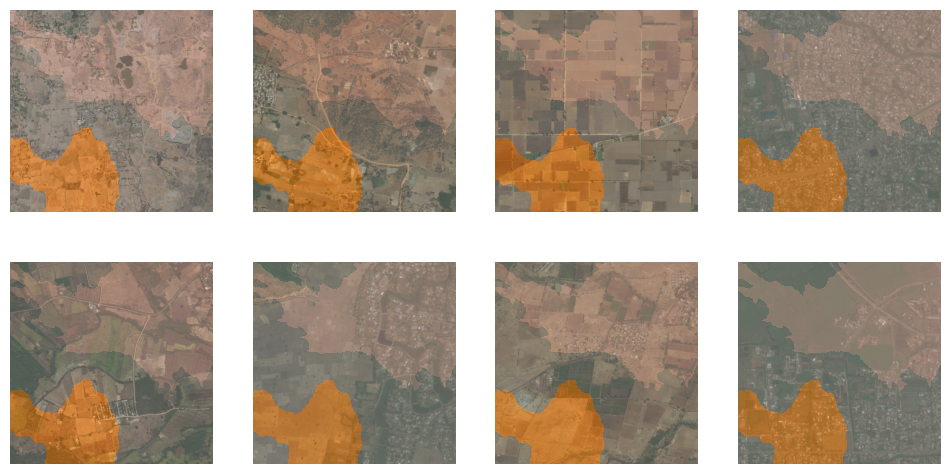

In [64]:
dls.show_batch()